In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Duomenų rinkiniai - https://data.gov.lt/datasets/1828/#info
# (Elektros energijos suvartojimas pagal regionus, kas pusmetį)


# Pateikite elektros energijos
# suvartojimo apžvalgą: Kokie regionai/miestai daugiausiai vartojo,
# kurie - mažiausiai? Ar yra priklausomybė tarp vartojimo ir
# mėnesių, vidutinių mėnesio meteorologinių sąlygų? Ar galite
# surasti/identifikuoti elektros energiją pasigaminančius vartotojus?
# Su plotly.express scatter_mapbox()
# vizualizuokite daugiausiai energijos vartojančius
# miestus/miestelius/teritorijas. Daug energijos vartojantis objektas –
# suvartoja ~30 proc daugiau el. energijos, nei vidutinis energijos
# suvartojimas objekto teritorijoje.

In [10]:
didmiesciai1 = pd.read_csv('../../../eismas/didmiesciai1.csv',sep=';')
didmiesciai2 = pd.read_csv('../../../eismas/didmiesciai2.csv', sep=';')
vidutiniai1 = pd.read_excel('../../../eismas/vidutiniai1.xlsx')
vidutiniai2 = pd.read_csv('../../../eismas/vidutiniai2.csv', sep=';', encoding="windows-1257")
kiti1 = pd.read_csv('../../../eismas/kiti1.csv',sep=';', encoding="windows-1257")
kiti2 = pd.read_csv('../../../eismas/kiti2.csv', sep=';', encoding="windows-1257")
# vidutiniai2.head(2)

In [12]:
didmiesciai1 = didmiesciai1.drop_duplicates()
didmiesciai1.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06
0,Vilniaus regionas,KV,NaN,NaN,0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
1,Vilniaus regionas,KV,NaN,NaN,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8


In [13]:
didmiesciai2 = didmiesciai2.drop_duplicates()
didmiesciai2.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Vilniaus regionas,KV,NaN,NaN,0,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0
1,Vilniaus regionas,KV,NaN,NaN,NaN,4047020.8,3941376.4,3819321.4,3913849.0,3877301.2,3998284.0


In [14]:
vidutiniai1 = vidutiniai1.drop_duplicates()
vidutiniai1.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06
0,Šiaulių regionas,KV,NaN,NaN,NaN,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0
2,Šiaulių regionas,KV,NaN,NaN,0,1052547.8,908230.0,1135250.2,1120408.4,1185698.4,1253056.0


In [15]:
vidutiniai2 = vidutiniai2.drop_duplicates()
vidutiniai2.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Šiaulių regionas,KV,NaN,NaN,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
1,Šiaulių regionas,KV,NaN,NaN,0.0,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0


In [16]:
kiti1 = kiti1.drop_duplicates()
kiti1.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06
0,Švenčionių regionas,KV,T,NaN,0.0,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2
1,Švenčionių regionas,KV,NaN,NaN,NaN,605781.0,575742.2,584244.2,548519.8,518863.6,611692.2


In [17]:
kiti2 = kiti2.drop_duplicates()
kiti2.head(2)

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Švenčionių regionas,KV,T,NaN,0.0,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0
1,Švenčionių regionas,KV,NaN,NaN,NaN,616291.6,568311.2,537184.4,558586.2,777806.0,562580.0


In [9]:
didmiesciai1.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH07',
       'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12'],
      dtype='object')

In [20]:
didm_gr1 = didmiesciai1.groupby('REGIONAS')[['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']].sum().reset_index()
didm_gr1.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07


In [21]:
didmiesciai2.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH07',
       'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12'],
      dtype='object')

In [22]:
didm_gr2 = didmiesciai2.groupby('REGIONAS')[['KWH07','KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']].sum().reset_index()
didm_gr2.head(2)

,REGIONAS,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Kauno regionas,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08
1,Klaipėdos regionas,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07


In [23]:
didm = pd.merge(didm_gr1, didm_gr2, how='left', on='REGIONAS')
didm.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07


In [25]:
didm['bendras'] = didm.drop('REGIONAS', axis=1).sum(axis=1)
didm.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12,bendras
0,Kauno regionas,1.219657e+08,1.192787e+08,1.196831e+08,1.102187e+08,1.064671e+08,1.094048e+08,1.110757e+08,1.044560e+08,1.098376e+08,1.160255e+08,1.226913e+08,1.425979e+08,1.393702e+09
1,Klaipėdos regionas,6.760214e+07,6.253260e+07,6.401894e+07,5.933475e+07,5.602941e+07,5.798408e+07,6.320891e+07,6.103544e+07,6.086513e+07,6.452075e+07,6.647958e+07,7.821187e+07,7.618236e+08


In [15]:
didm.columns

Index(['REGIONAS', 'KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06',
       'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'bendras'],
      dtype='object')

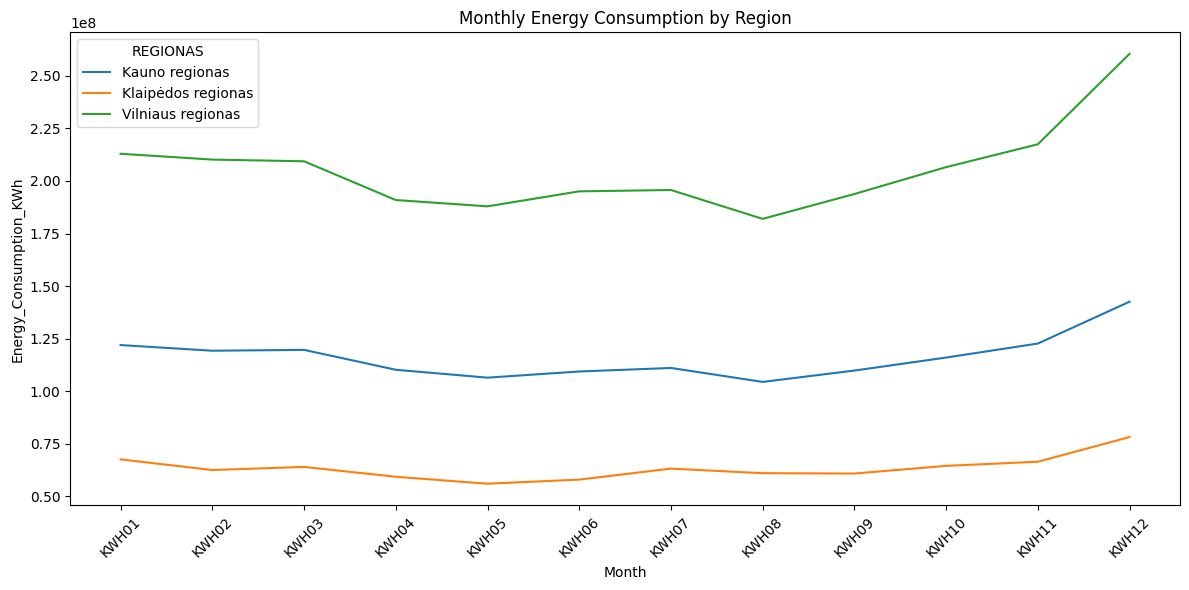

In [26]:

# Create DataFrame
# df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_long = pd.melt(didm.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption_KWh')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Month', y='Energy_Consumption_KWh', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()

# Įžvelgiame kad kuo didisnis regionas, tuo daugiau energijos suvartojamam.
# Energijos vartojimas sumažėjas ties pavasariu ir rudeniu.
# Vasarą tikėtina daugiau papildomos energijos suvartojama dėl kondicionavimo, žiemą - dėl šildymo

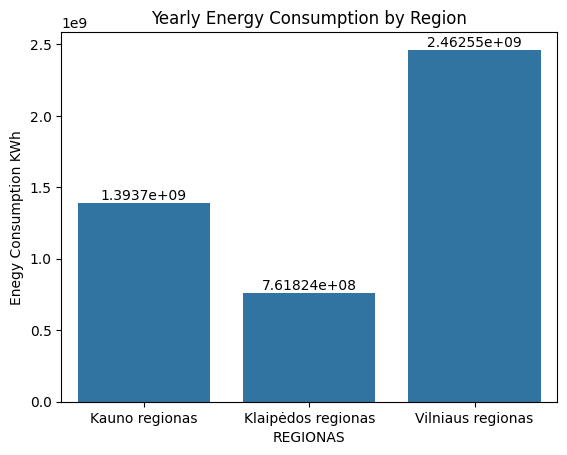

In [27]:
fig, ax = plt.subplots()
sns.barplot(data=didm, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
for i in ax.containers:
    ax.bar_label(i)
plt.show()
#  Didmiesčiause daugiausiai per metus energijos suvartoja Vilniaus regionas.
# Vilniaus regionas suvartoja daugiau energijos nei Kauno ir Klaipėdos regionai kartu sudėjus

In [18]:
vidutiniai1.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH01',
       'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06'],
      dtype='object')

In [28]:
vidm_gr1 = vidutiniai1.groupby('REGIONAS')[['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']].sum().reset_index()
vidm_gr2 = vidutiniai2.groupby('REGIONAS')[['KWH07','KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']].sum().reset_index()
vidm = pd.merge(vidm_gr1, vidm_gr2, how='left', on='REGIONAS')
vidm.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.4,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73
1,Mažeikių regionas,11401332.57,11374781.22,11428588.87,10340079.98,9682333.43,9575865.26,10164750.4,10066682.91,10309351.52,10771939.15,11066901.31,13667459.33


In [29]:
vidm['bendras'] = vidm.drop('REGIONAS', axis=1).sum(axis=1)
vidm.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12,bendras
0,Alytaus regionas,20123299.60,19866989.61,19913215.16,18020739.73,17207822.57,17636441.35,15514579.4,15213504.72,15583302.57,16049473.89,16216005.07,20262488.73,2.116079e+08
1,Mažeikių regionas,11401332.57,11374781.22,11428588.87,10340079.98,9682333.43,9575865.26,10164750.4,10066682.91,10309351.52,10771939.15,11066901.31,13667459.33,1.298501e+08


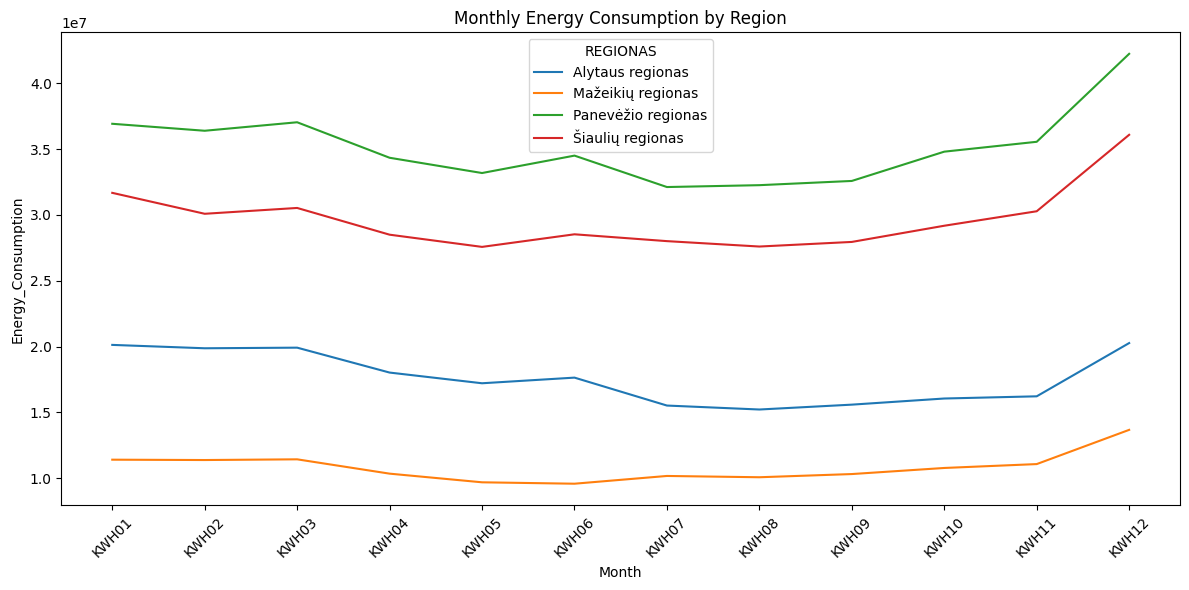

In [30]:
# Melt the DataFrame to long format
df_long_vidm = pd.melt(vidm.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_vidm, x='Month', y='Energy_Consumption', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()
# Matome kad kuo rajonas didesnis(pagal žmonių skaičių), tuo energijos suvartojimas didesnis
# Energijos vartojimas sumažėjas ties pavasariu ir rudeniu.
# Vasarą tikėtina daugiau papildomos energijos suvartojama dėl kondicionavimo, žiemą - dėl šildymo

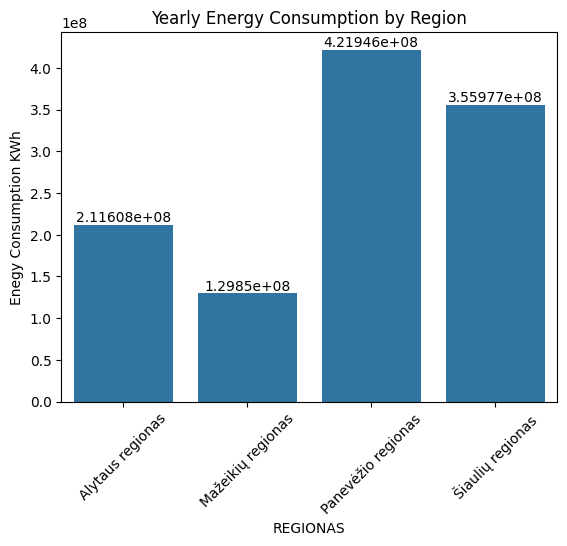

In [31]:
fig, ax = plt.subplots()
sns.barplot(data=vidm, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [23]:
kiti1.columns

Index(['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH01',
       'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06'],
      dtype='object')

In [32]:
kiti_gr1 = kiti1.groupby('REGIONAS')[['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']].sum().reset_index()
kiti_gr2 = kiti2.groupby('REGIONAS')[['KWH07','KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']].sum().reset_index()
kiti = pd.merge(kiti_gr1, kiti_gr2, how='inner', on='REGIONAS')
kiti.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Ignitis INT,41701247.14,77143743.66,59479933.82,63679701.76,54315121.04,52418481.41,54378473.34,53126116.33,56282256.22,59271665.85,66208154.39,84533569.88
1,"Ignitis INT,BV,T,,""10,01"",0.0,0.0,0.0,0.0,0.0,0.0",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
kiti = kiti[~kiti['REGIONAS'].str.contains('Ignitis', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('KV,', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('BV,', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('skyrius', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('grupė', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('komanda', na=False)]
kiti = kiti[~kiti['REGIONAS'].str.contains('direktorius', na=False)]
kiti.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
17,Jonavos regionas,8989977.27,9747376.68,9151209.17,8411279.30,7784686.95,7816668.67,7639108.85,7466211.69,8180874.79,8584076.61,8618064.49,11258923.05
18,Joniškio regionas,4270207.66,4274420.34,4280354.37,3818309.29,3615251.57,3958313.09,4734912.24,5144782.22,4624561.78,4689332.08,5114860.87,6364091.55


In [34]:
kiti['bendras'] = kiti.drop('REGIONAS', axis=1).sum(axis=1)
kiti.head(2)

,REGIONAS,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12,bendras
17,Jonavos regionas,8989977.27,9747376.68,9151209.17,8411279.30,7784686.95,7816668.67,7639108.85,7466211.69,8180874.79,8584076.61,8618064.49,11258923.05,1.036485e+08
18,Joniškio regionas,4270207.66,4274420.34,4280354.37,3818309.29,3615251.57,3958313.09,4734912.24,5144782.22,4624561.78,4689332.08,5114860.87,6364091.55,5.488940e+07


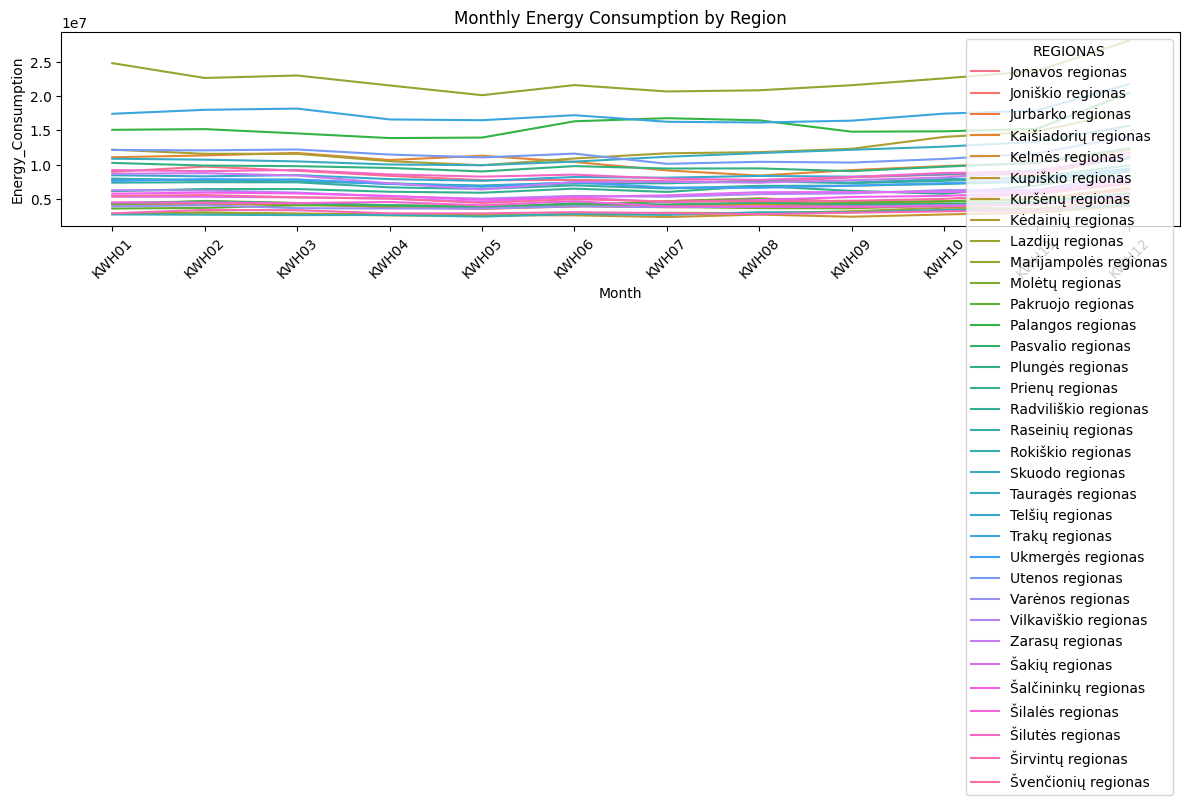

In [35]:
# Melt the DataFrame to long format
df_long_kiti = pd.melt(kiti.drop(columns=['bendras']), id_vars=['REGIONAS'], var_name='Month', value_name='Energy_Consumption')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_kiti, x='Month', y='Energy_Consumption', hue='REGIONAS')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title('Monthly Energy Consumption by Region')
plt.tight_layout()
plt.show()

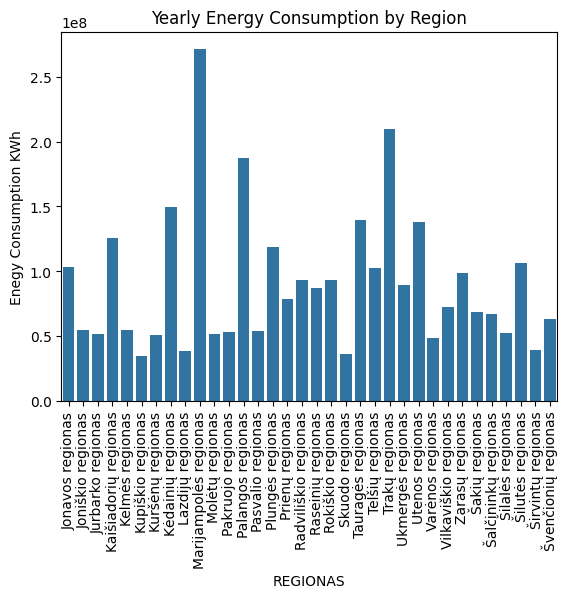

In [36]:
fig, ax = plt.subplots()
sns.barplot(data=kiti, x='REGIONAS', y='bendras')
plt.title('Yearly Energy Consumption by Region')
plt.ylabel('Enegy Consumption KWh')
plt.xticks(rotation=90)
# for i in ax.containers:
#     ax.bar_label(i)
plt.show()

In [37]:
kiti_suma = kiti['bendras'].sum()
vidm_suma = vidm['bendras'].sum()
print(kiti_suma)
print(vidm_suma)

3087737539.48
1119381341.63


In [38]:
Vilnius = didm[didm['REGIONAS'] == 'Vilniaus regionas']['bendras'].iloc[0]
Kaunas = didm[didm['REGIONAS'] == 'Kauno regionas']['bendras'].iloc[0]
Klaipeda = didm[didm['REGIONAS'] == 'Klaipėdos regionas']['bendras'].iloc[0]


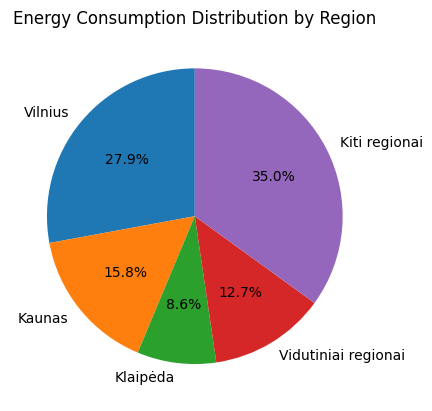

In [39]:
labeliai = ['Vilnius', 'Kaunas', 'Klaipėda', 'Vidutiniai regionai', 'Kiti regionai']
suvartojimas = [Vilnius, Kaunas, Klaipeda, vidm_suma, kiti_suma] # metinis energinos suvartojimas

plt.pie(suvartojimas, labels=labeliai, autopct='%1.1f%%', startangle=90)

# Title
plt.title('Energy Consumption Distribution by Region')

# Show the plot
plt.show()
# Matome, kad šiek tie daugiau nei puse Lietuvos suvartojamos energijos suvartoja trijų didžiųjų miestų regionai

In [40]:
# Titanikas
train = pd.read_csv('../../../eismas/titanic/train.csv')
test = pd.read_csv('../../../eismas/titanic/test.csv')
gender = pd.read_csv('../../../eismas/titanic/gender_submission.csv')

In [41]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [42]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
